In [2]:
import datetime  # 현재 날짜와 시간을 기록하기 위한 datetime 라이브러리
import numpy as np  # 수학 및 배열 관련 작업을 위한 numpy 라이브러리
import matplotlib.pyplot as plt  # 그래픽 시각화를 위한 matplotlib.pyplot 라이브러리
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D  # Keras에서 사용되는 레이어 모듈
from keras.models import Model, load_model  # Keras에서 모델 구축 및 불러오기를 위한 모듈
from keras.preprocessing.image import ImageDataGenerator  # 이미지 데이터를 증강하고 전처리하기 위한 모듈
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau  # 모델 학습 중 사용되는 콜백 함수들

# 시각화 스타일을 dark_background로 설정
plt.style.use('dark_background')

# Load Dataset

내 눈

In [29]:
# 'newDataset' 디렉토리에서 훈련 데이터와 레이블, 검증 데이터와 레이블을 불러옴
x_train = np.load('dataset/eye/x_train.npy').astype(np.float32)  # 훈련 데이터 불러오기 및 데이터 타입을 float32로 변환
y_train = np.load('dataset/eye/y_train.npy').astype(np.float32)  # 훈련 레이블 불러오기 및 데이터 타입을 float32로 변환
x_val = np.load('dataset/eye/x_val.npy').astype(np.float32)  # 검증 데이터 불러오기 및 데이터 타입을 float32로 변환
y_val = np.load('dataset/eye/y_val.npy').astype(np.float32)  # 검증 레이블 불러오기 및 데이터 타입을 float32로 변환

# 불러온 데이터의 형태 출력
print(x_train.shape, y_train.shape)  # 훈련 데이터의 형태 출력: (1615, 26, 34) - 1615개의 샘플, 각각의 샘플은 26x34 크기의 이미지
print(x_val.shape, y_val.shape)  # 검증 데이터의 형태 출력: (404, 26, 34) - 404개의 샘플, 각각의 샘플은 26x34 크기의 이미지



(1615, 26, 34) (1615, 1)
(404, 26, 34) (404, 1)


내 입

In [3]:
# 'newDataset' 디렉토리에서 훈련 데이터와 레이블, 검증 데이터와 레이블을 불러옴
x_train = np.load('dataset/lip/x_train.npy').astype(np.float32)  # 훈련 데이터 불러오기 및 데이터 타입을 float32로 변환
y_train = np.load('dataset/lip/y_train.npy').astype(np.float32)  # 훈련 레이블 불러오기 및 데이터 타입을 float32로 변환
x_val = np.load('dataset/lip/x_val.npy').astype(np.float32)  # 검증 데이터 불러오기 및 데이터 타입을 float32로 변환
y_val = np.load('dataset/lip/y_val.npy').astype(np.float32)  # 검증 레이블 불러오기 및 데이터 타입을 float32로 변환

# 불러온 데이터의 형태 출력
print(x_train.shape, y_train.shape)  # 훈련 데이터의 형태 출력: (1600, 10, 10) - 1600개의 샘플, 각각의 샘플은 10x10 크기의 이미지
print(x_val.shape, y_val.shape)  # 검증 데이터의 형태 출력: (400, 10, 10) - 400개의 샘플, 각각의 샘플은 10x10 크기의 이미지

(1600, 10, 10) (1600, 1)
(400, 10, 10) (400, 1)


# Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 정의
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

# 이미지 데이터의 shape을 (이미지 수, 높이, 너비, 채널)로 변경
x_train = x_train.reshape(x_train.shape[0], 10, 10, 1)
x_val = x_val.reshape(x_val.shape[0], 10, 10, 1)

# flow 메서드를 사용하여 데이터 생성
train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)


# Build Model

In [10]:
inputs = Input(shape=(10, 10, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 10, 10, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856 

# Train

In [11]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit_generator(
    train_generator, epochs=50, validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('models/%s.h5' % (start_time), monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Epoch 1/50


/var/folders/wl/5h8ygnjj29ndbpccd4zxqbfh0000gn/T/ipykernel_23887/3027296455.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


49/50 [============================>.] - ETA: 0s - loss: 0.3773 - acc: 0.8106
Epoch 1: val_acc improved from -inf to 0.91000, saving model to models/2024_01_03_14_14_47.h5
50/50 [==============================] - 1s 6ms/step - loss: 0.3751 - acc: 0.8112 - val_loss: 0.2543 - val_acc: 0.9100 - lr: 0.0010
Epoch 2/50
46/50 [==========================>...] - ETA: 0s - loss: 0.1467 - acc: 0.9477

/Users/shinjongsoo/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_acc improved from 0.91000 to 0.96500, saving model to models/2024_01_03_14_14_47.h5
50/50 [==============================] - 0s 4ms/step - loss: 0.1438 - acc: 0.9500 - val_loss: 0.1042 - val_acc: 0.9650 - lr: 0.0010
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 0.1204 - acc: 0.9588
Epoch 3: val_acc did not improve from 0.96500
50/50 [==============================] - 0s 5ms/step - loss: 0.1204 - acc: 0.9588 - val_loss: 0.1626 - val_acc: 0.9375 - lr: 0.0010
Epoch 4/50
44/50 [=========================>....] - ETA: 0s - loss: 0.1053 - acc: 0.9673
Epoch 4: val_acc improved from 0.96500 to 0.99000, saving model to models/2024_01_03_14_14_47.h5
50/50 [==============================] - 0s 6ms/step - loss: 0.1012 - acc: 0.9675 - val_loss: 0.0396 - val_acc: 0.9900 - lr: 0.0010
Epoch 5/50
48/50 [===========================>..] - ETA: 0s - loss: 0.0772 - acc: 0.9753
Epoch 5: val_acc did not improve from 0.99000
50/50 [==============================] - 0s 5ms/st

# Confusion Matrix

13/13 [==============================] - 0s 1ms/step
test acc: 1.0


<Axes: >

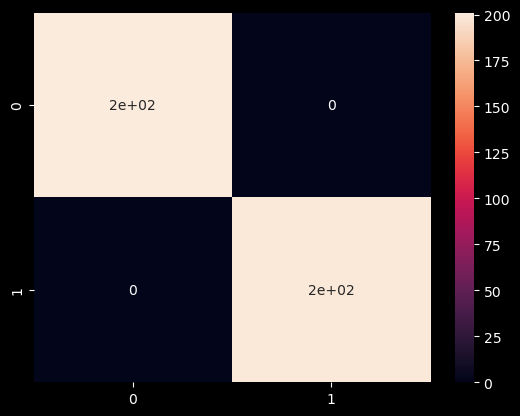

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = load_model('models/%s.h5' % (start_time))

y_pred = model.predict(x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(int)

print ('test acc: %s' % accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)